# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [4]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [5]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

### What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

In [10]:
# Check class distribution
fraud['fraud'].value_counts(normalize=True) * 100

fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64

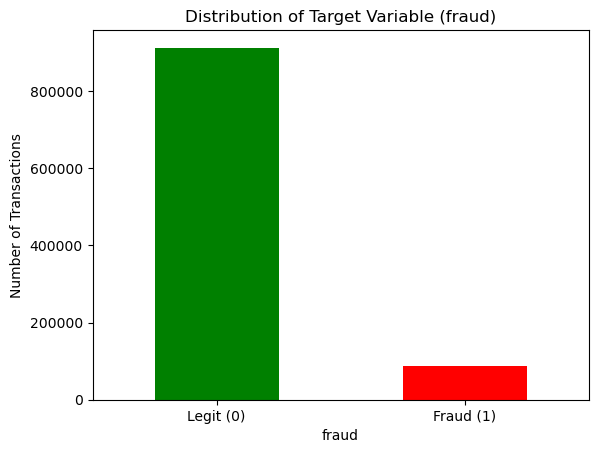

In [11]:
import matplotlib.pyplot as plt

# Bar plot of target distribution
fraud['fraud'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xticks([0, 1], ['Legit (0)', 'Fraud (1)'], rotation=0)
plt.title("Distribution of Target Variable (fraud)")
plt.ylabel("Number of Transactions")
plt.show()


### Train a LogisticRegression.

In [18]:
from sklearn.model_selection import train_test_split

# Features and target
X = fraud.drop('fraud', axis=1)
y = fraud['fraud']

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(class_weight='balanced', random_state=42)

## Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred = log_reg.predict(X_test_scaled)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 93.48%

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

Confusion Matrix:
[[170387  12132]
 [   911  16570]]


## Run Oversample in order to balance our target variable and repeat the steps above, now with balanced data.
## Does it improve the performance of our model?

In [26]:
from imblearn.over_sampling import SMOTE


In [28]:
# Applying SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Checking new class distribution
from collections import Counter
print("Resampled class distribution:", Counter(y_train_resampled))


Resampled class distribution: Counter({0.0: 730078, 1.0: 730078})


In [30]:
from sklearn.linear_model import LogisticRegression

# Train the model on resampled data
log_reg_balanced = LogisticRegression(random_state=42)
log_reg_balanced.fit(X_train_resampled, y_train_resampled)


LogisticRegression(random_state=42)

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on original test data
y_pred_balanced = log_reg_balanced.predict(X_test_scaled)

# Evaluation
print(f" Accuracy (Balanced Data): {accuracy_score(y_test, y_pred_balanced):.2%}")
print("\n Classification Report (Balanced Model):")
print(classification_report(y_test, y_pred_balanced))
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))


 Accuracy (Balanced Data): 93.48%

 Classification Report (Balanced Model):
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

 Confusion Matrix:
[[170386  12133]
 [   907  16574]]


## Now, run Undersample in order to balance our target variable and repeat the steps above (1-3), now with balanced data.
## Does it improve the performance of our model?

In [34]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling to the original scaled training set
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train_scaled, y_train)

# Checking new class distribution
from collections import Counter
print("Resampled (undersampled) class distribution:", Counter(y_train_under))


Resampled (undersampled) class distribution: Counter({0.0: 69922, 1.0: 69922})


In [36]:
from sklearn.linear_model import LogisticRegression

# Initializing and train model
log_reg_under = LogisticRegression(random_state=42)
log_reg_under.fit(X_train_under, y_train_under)


LogisticRegression(random_state=42)

In [40]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicting on original (unbalanced) test data
y_pred_under = log_reg_under.predict(X_test_scaled)

# Evaluation
print(f" Accuracy (Undersampled Data): {accuracy_score(y_test, y_pred_under):.2%}")
print("\n Classification Report (Undersampled Model):")
print(classification_report(y_test, y_pred_under))
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_under))


 Accuracy (Undersampled Data): 93.48%

 Classification Report (Undersampled Model):
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

 Confusion Matrix:
[[170394  12125]
 [   918  16563]]


In [ ]:
Finally, run SMOTE in order to balance our target variable and repeat the steps above (1-3), 
now with balanced data. Does it improve the performance of our model?                  

In [42]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Check new class distribution
print("SMOTE Resampled Class Distribution:", Counter(y_train_smote))


SMOTE Resampled Class Distribution: Counter({0.0: 730078, 1.0: 730078})


In [46]:
from sklearn.linear_model import LogisticRegression

# Initialize and train Logistic Regression on SMOTE data
log_reg_smote = LogisticRegression(random_state=42)
log_reg_smote.fit(X_train_smote, y_train_smote)


LogisticRegression(random_state=42)

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict
y_pred_smote = log_reg_smote.predict(X_test_scaled)

# Evaluate
print(f" Accuracy (SMOTE): {accuracy_score(y_test, y_pred_smote):.2%}")
print("\n Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))
print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_smote))

 Accuracy (SMOTE): 93.48%

 Classification Report (SMOTE):
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    182519
         1.0       0.58      0.95      0.72     17481

    accuracy                           0.93    200000
   macro avg       0.79      0.94      0.84    200000
weighted avg       0.96      0.93      0.94    200000

 Confusion Matrix:
[[170386  12133]
 [   907  16574]]


### Model Evaluation Summary Using SMOTE

In [ ]:


print("🔍 Accuracy: 93.48% — The model correctly classified most transactions overall.")
print("✅ Recall (Fraud): 95% — Excellent! The model correctly identified 95% of all actual frauds.")
print("🎯 F1-score (Fraud): 0.72 — A solid balance between precision and recall.")
print("⚠️ Precision (Fraud): 0.58 — Some false positives, which is often acceptable in fraud detection.")
print("\n🧩 Confusion Matrix:")
print("   [170,386  12,133]  <- Legit transactions")
print("   [   907   16,574]  <- Fraud transactions")
print("\n📈 Interpretation:")
print("   - SMOTE significantly improved the model's ability to detect fraudulent transactions.")
print("   - The trade-off: a higher number of false alarms (false positives), but far fewer missed frauds.")
